# Fiatlight Architecture

In [2]:
# Necessary imports for this doc page
from fiatlight.fiat_notebook import plantuml_magic, display_markdown_from_file

# Class diagrams

## fiat_core

This is the foundational package of the fiatlight framework. It focuses on wrapping data and functions with GUI elements to facilitate interaction.

**Classes**

* `AnyDataWithGui`: Wraps any type of data with a GUI. This class manages the data value and its associated callbacks, and it provides methods to serialize/deserialize the data to/from JSON.
* `AnyDataGuiCallbacks`: Stores callback functions for AnyDataWithGui, enhancing interactivity by allowing custom widgets and presentations.
* `FunctionWithGui`: Encapsulates a function, enriching it with a GUI based on inferred input and output types. It handles function invocation and manages internal states like exceptions and execution flags.
* `ParamWithGui` and `OutputWithGui`: These classes link parameters and outputs of functions to their GUI representations.
* `FunctionNode`: Represents a node in a function graph, containing links to other function nodes and managing data flow between them.
* `FunctionNodeLink`: Defines a link between outputs of one function node and inputs of another, facilitating data flow in the function graph.
* `FunctionsGraph`: Represents a graph of interconnected FunctionNode instances, effectively mapping the entire functional structure.



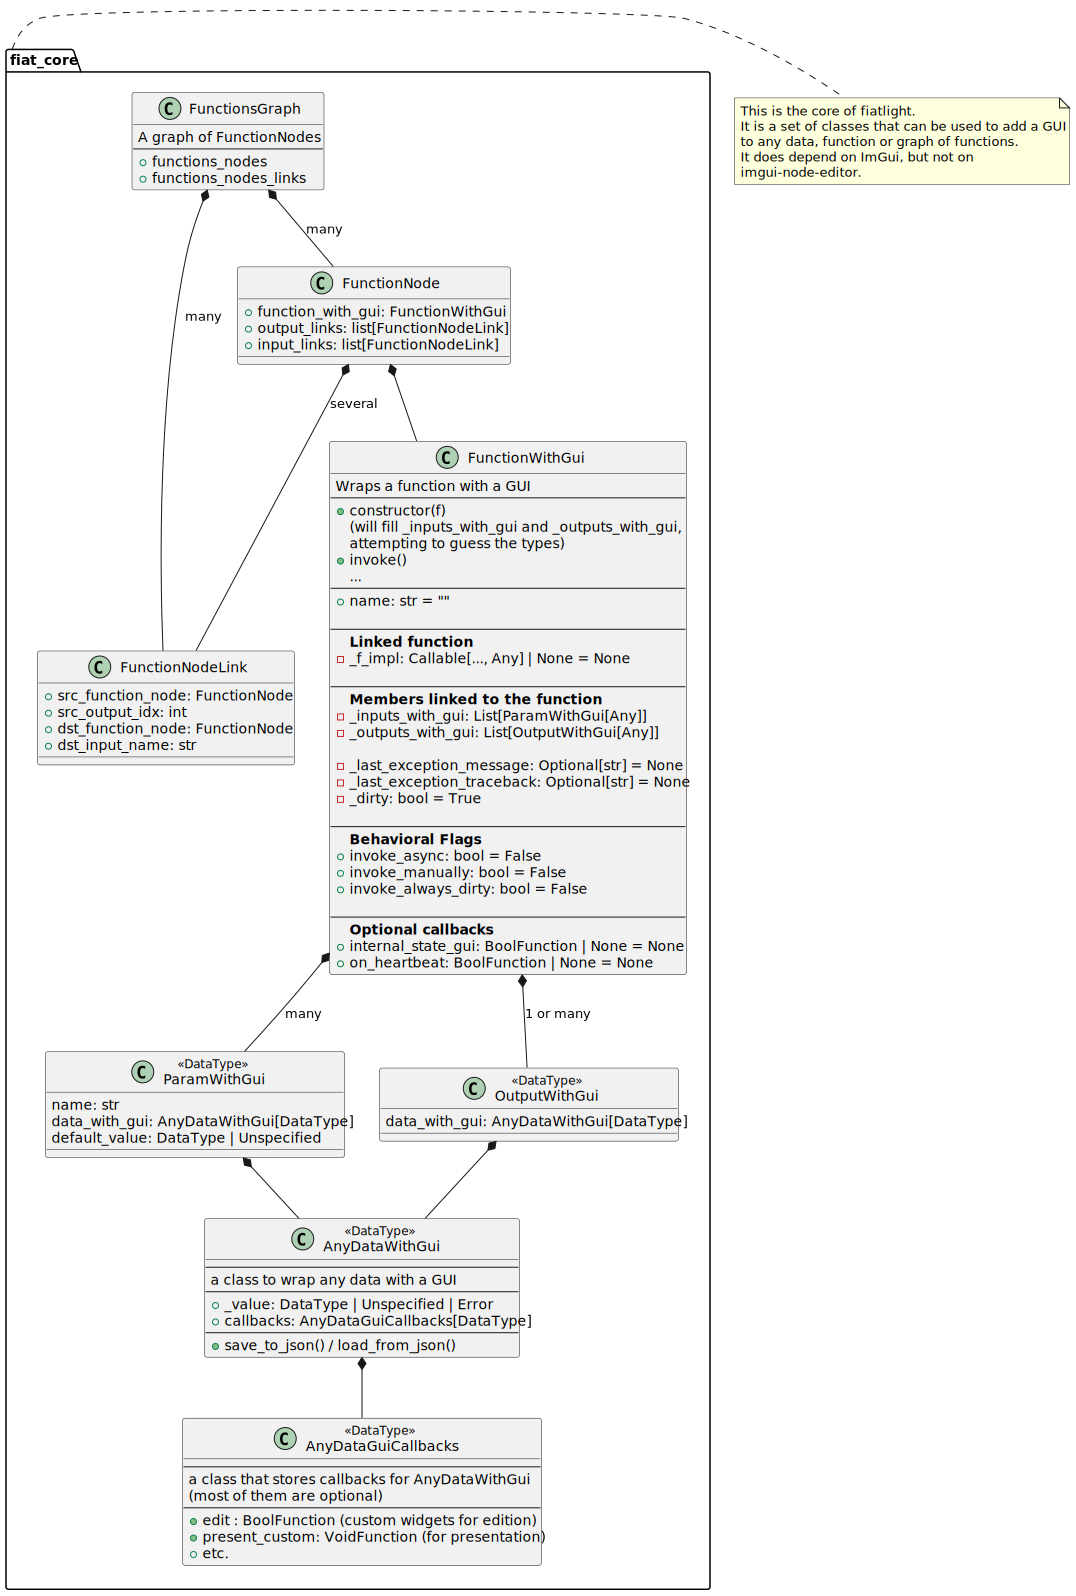

In [3]:
%plantuml_include class_diagrams/fiat_core.puml

## fiat_togui

fiat_togui provides functions to register new types (classes, dataclasses, enums) so that they are associated with a GUI.

**Functions**
* `register_type(type_, gui_type)`: register a GUI for a given type. gui_type must be a descendant of AnyDataWithGui
* `register_enum(enum_type)` and the equivalent decorator `enum_with_gui_registration`: register an enum
* `register_dataclass` and the equivalent decorator `dataclass_with_gui_registration`: register a dataclass base model
* `register_base_model` and the equivalent decorator `base_model_with_gui_registration`: register a pydantic base model

**Classes**
* `IntWithGui`, `FloatWithGui`, etc.: provides GUI for primitive types (int, str, float, bool)
* `OptionalWithGui`: able to add GUI to Optional[DataType] (if DataType is registered)

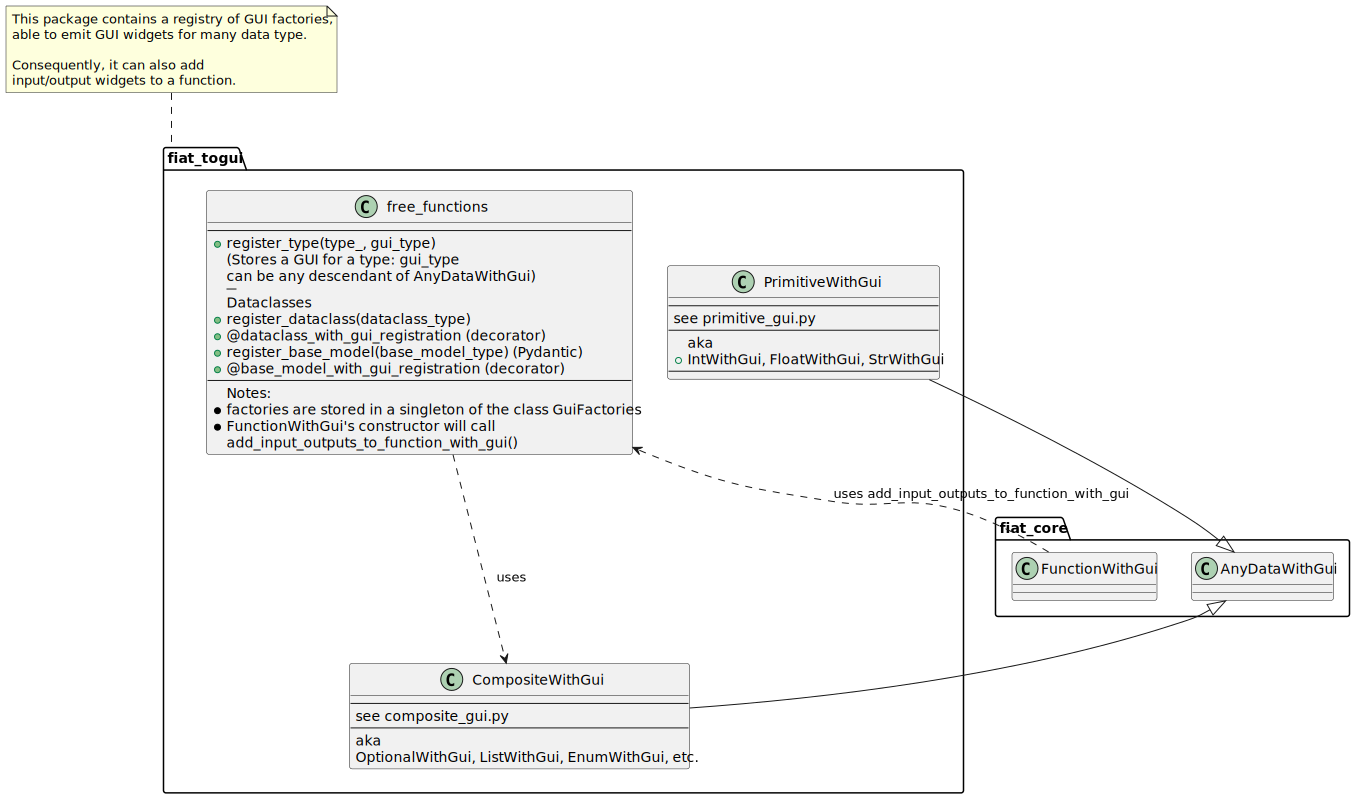

In [4]:
%plantuml_include class_diagrams/fiat_togui.puml

## fiat_runner

fiat_runner is the package that contains the "run" functions:

**Free function**

`fiat_run` accepts either a standard function, a list of functions, or a graph of functions. It executes the function(s) and displays the results in a GUI.

* `fiat_run(fn)`       # fn is a function or a FunctionWithGui
* `fiat_run([fn1, fn2, ...])`  # list of functions or FunctionWithGui
* `fiat_run(graph)` # A FunctionsGraph 
 

**Classes**

* `FiatlightGui`: The main runtime class that presents a GUI for interacting with a function graph. It orchestrates the execution and user interaction.
* `FiatlightGuiParams`: Stores configuration and parameters for the GUI application, such as visibility toggles and other settings.


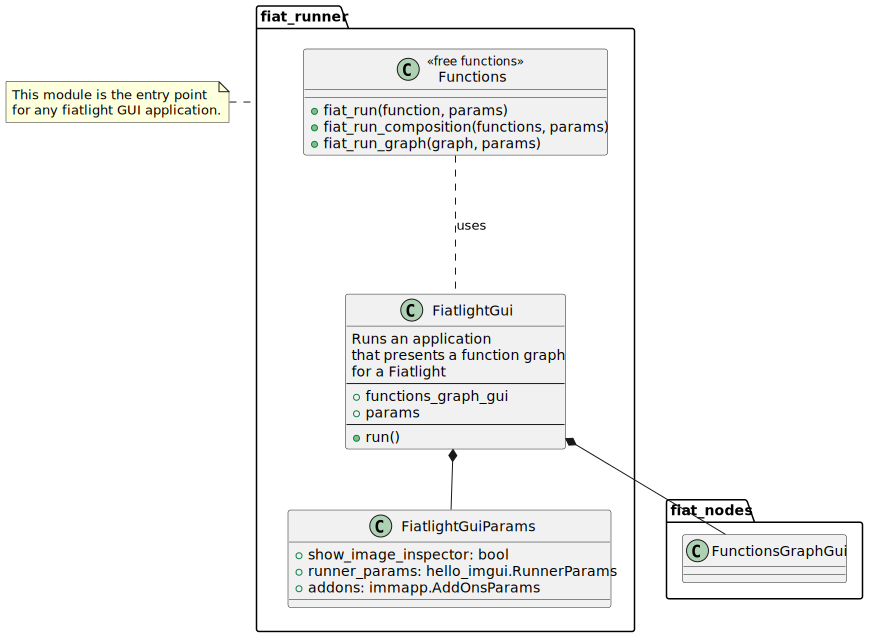

In [5]:
%plantuml_include class_diagrams/fiat_runner.puml

## fiat_nodes

fiat_nodes is the package that is able to display a function graph in a node editor (using [imgui-node-editor](https://github.com/thedmd/imgui-node-editor))

As a final user, you will probably not interact with it.

**Classes**

* `FunctionNodeGui`: The GUI representation of a FunctionNode
* `FunctionNodeLinkGui`: The GUI representation aspect of a FunctionNodeLink
* `FunctionsGraphGui`: The GUI representation of a FunctionsGraph

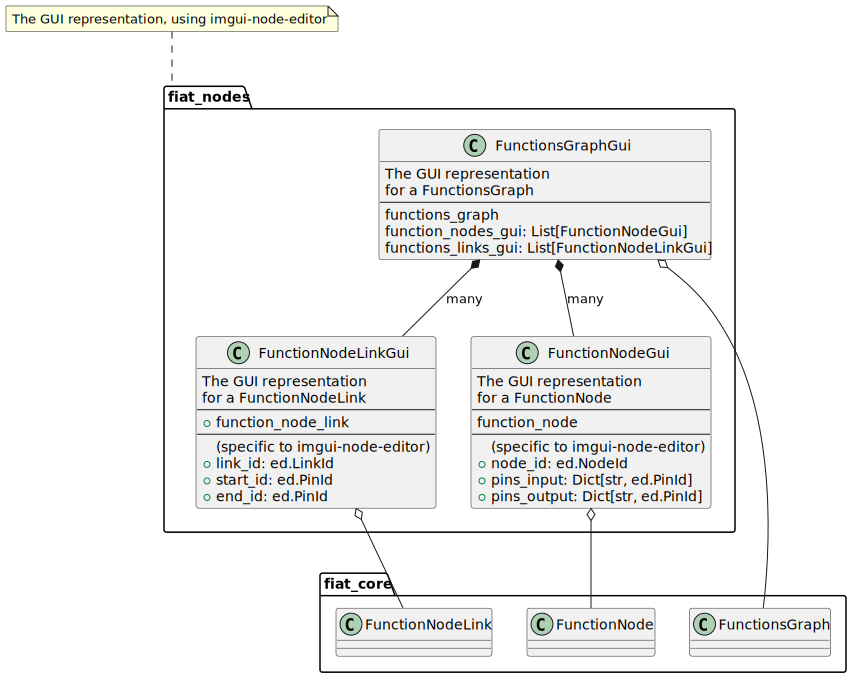

In [6]:
%plantuml_include class_diagrams/fiat_nodes.puml

## Full diagram

Below is the full class diagram


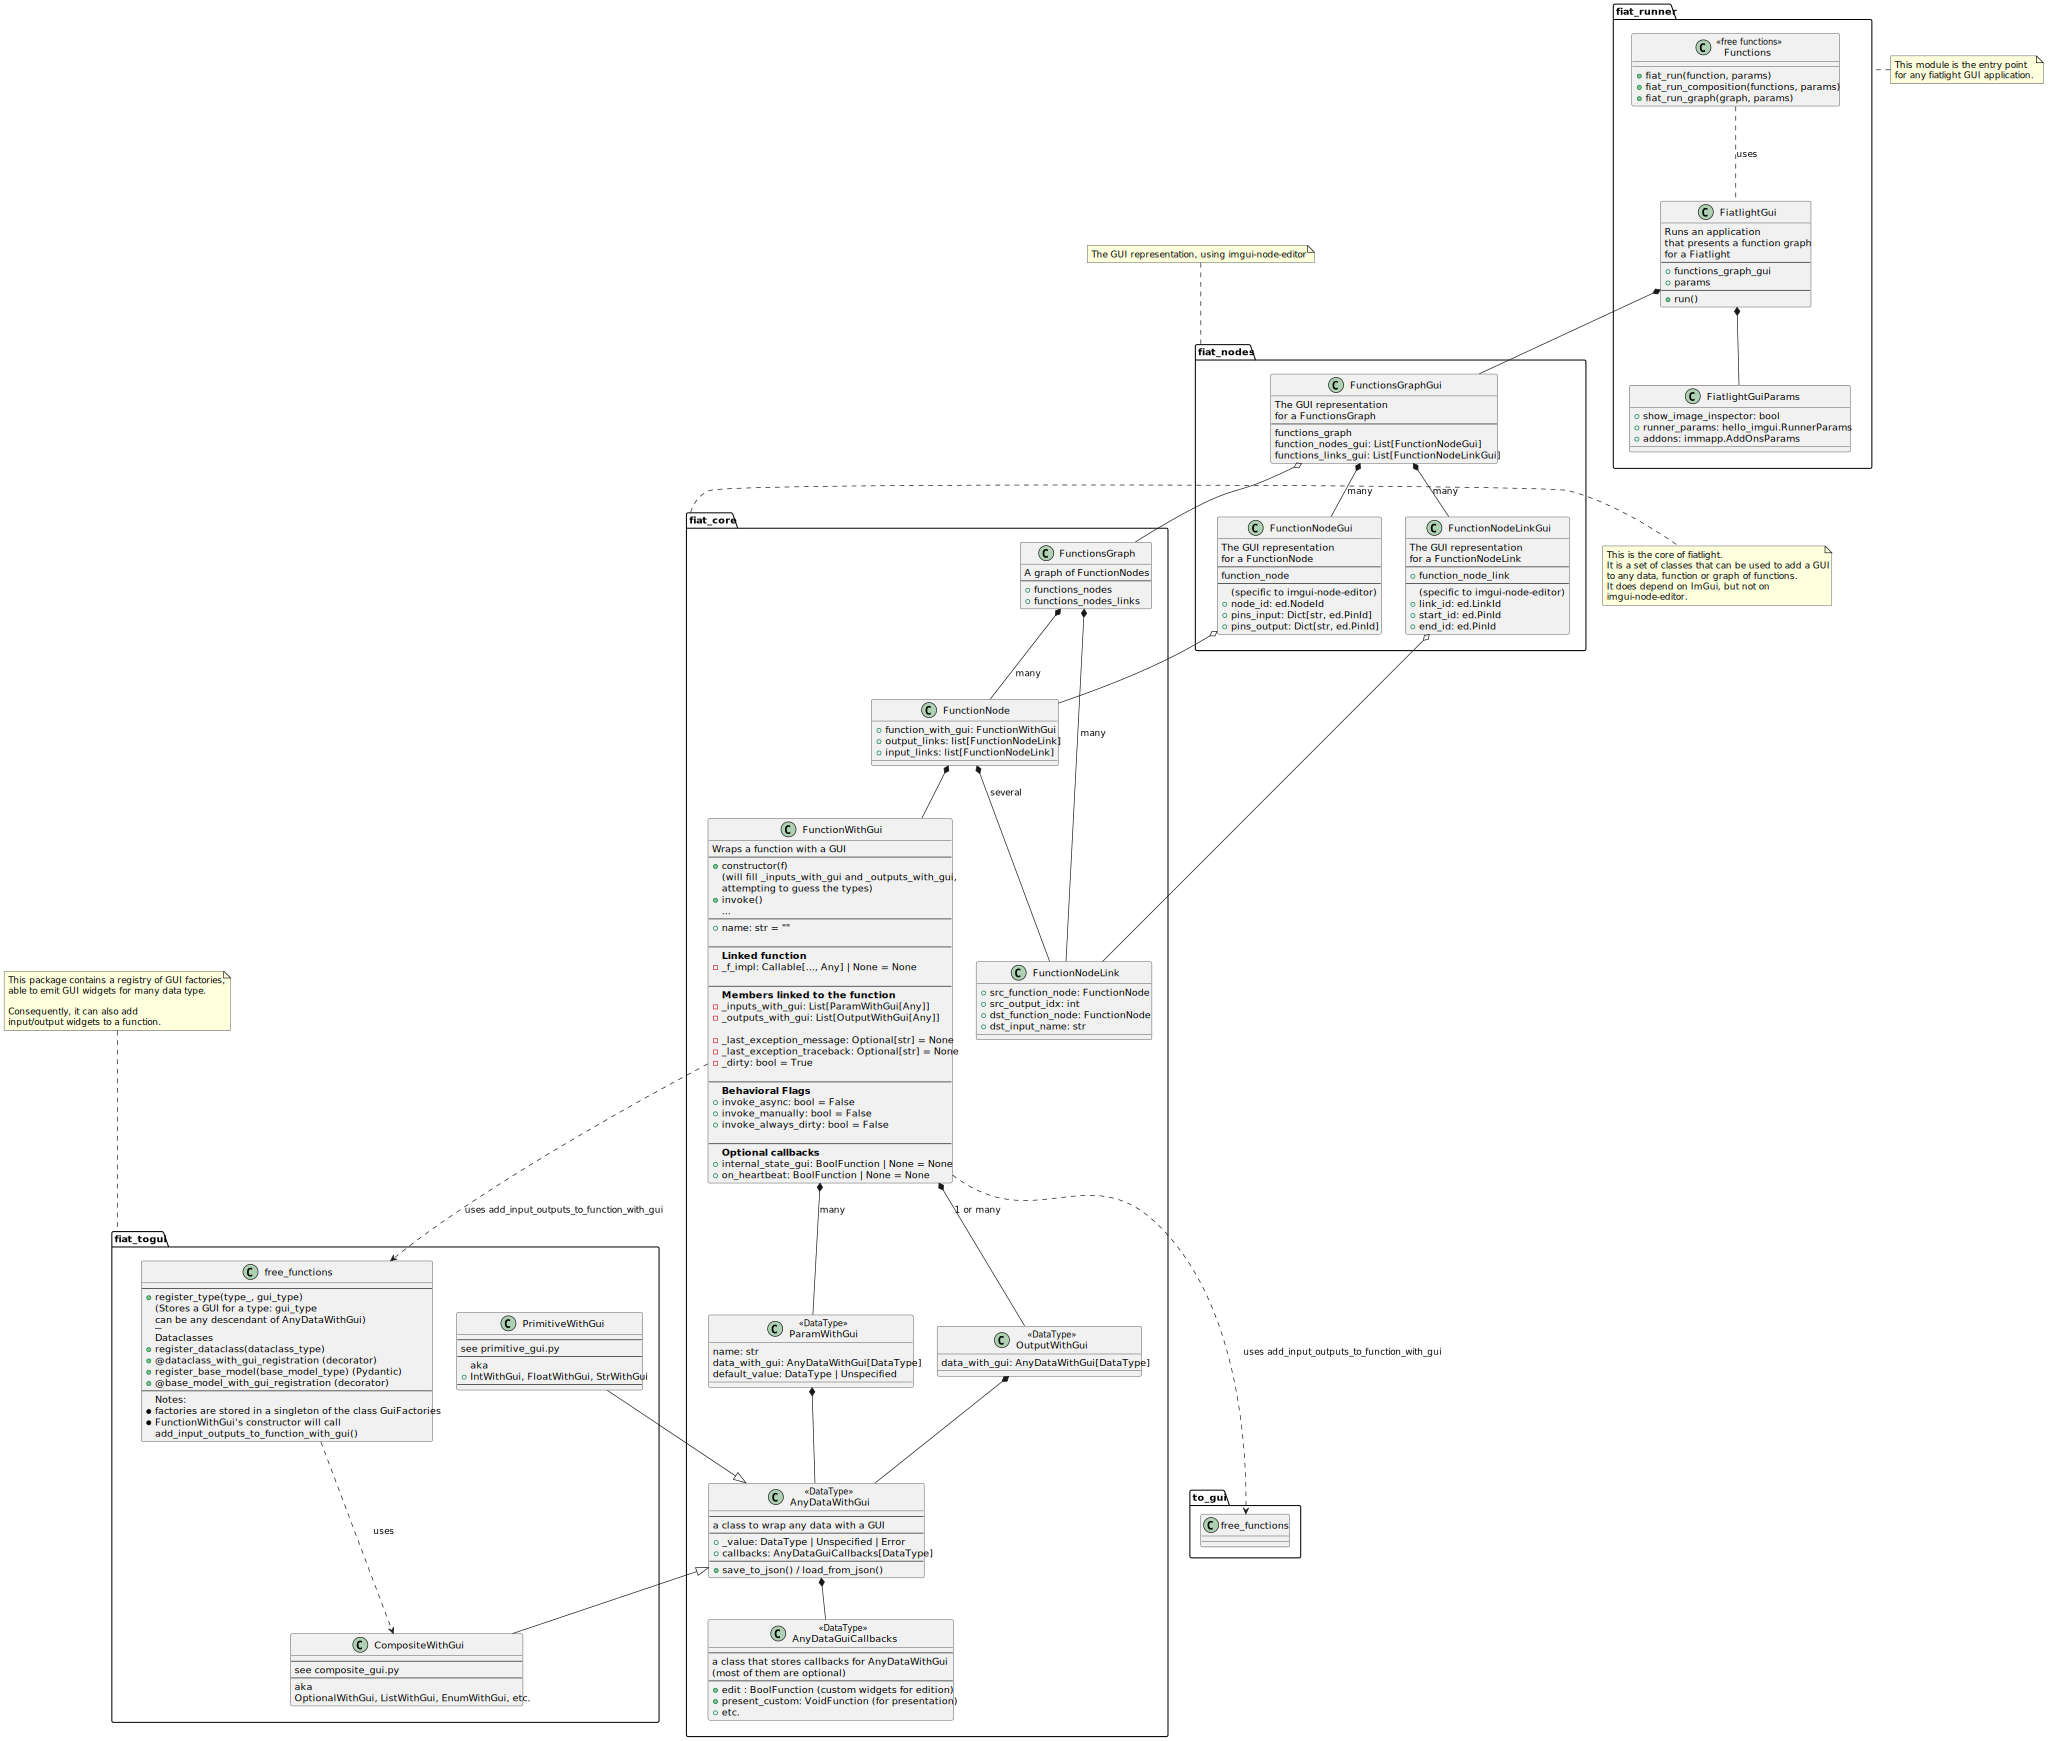

In [7]:
%plantuml_include class_diagrams/all.puml

# Folder structure

Below is the folder structure of the fiatlight framework.

In [8]:
display_markdown_from_file("folder_structure.md")

[//]: # ( tree -F -I "__pycache__|*json|*ini|doc|demos|sandbox|tests|doc|fiat_settings|priv_experiments|.*_demo.py" src/python/fiatlight/ )


```
src/python/fiatlight//
├── __init__.py
├── fiat_core/                                # core classes
│   ├── __init__.py                           # (AnyDataWithGui, FunctionWithGui, etc.)
│   ├── any_data_gui_callbacks.md
│   ├── any_data_gui_callbacks.py
│   ├── any_data_with_gui.md
│   ├── any_data_with_gui.py
│   ├── detailed_type.py
│   ├── function_node.py
│   ├── function_with_gui.py
│   ├── functions_graph.py
│   ├── output_with_gui.py
│   ├── param_with_gui.py
│   ├── possible_fiat_attributes.py
│   └── togui_exception.py
│
├── fiat_runner/                              # runner classes
│   ├── __init__.py                           # (fiat_run)
│   ├── fiat_gui.py
│   ├── fiat_run_notebook.py
│   └── functions_collection.py
│
├── fiat_togui/                              # fiat_togui utilities
│   ├── Readme.md -> fiat_togui.md           # This is the core of the powerful introspection
│   ├── __init__.py                          # capabilities of Fiatlight
│   ├── composite_gui.py
│   ├── composite_gui_demo.py
│   ├── dataclass_examples.py
│   ├── dataclass_gui.py
│   ├── dataclass_gui_demo.py
│   ├── explained_value_gui.py
│   ├── fiat_togui.md
│   ├── file_types_gui.py
│   ├── file_types_gui_demo.py
│   ├── function_signature.py
│   ├── make_gui_demo_code.py
│   ├── primitive_gui_demo.py
│   ├── primitives_gui.py
│   ├── str_with_gui.py
│   ├── str_with_gui_demo.py
│   ├── to_gui.py
│
├── fiat_config/                              # global configuration (style, colors, exception behavior, etc.)
│   ├── __init__.py
│   ├── fiat_config_def.py
│   └── fiat_style_def.py
│
├── fiat_types/                               # Some basic types used throughout Fiatlight
│   ├── __init__.py
│   ├── base_types.py
│   ├── color_types.py
│   ├── error_types.py
│   ├── fiat_number_types.py
│   ├── file_types.py
│   ├── function_types.py
│   ├── str_types.py
│
├── fiat_kits/                               # domain specific kits
│   ├── Readme.md -> fiat_kits.md
│   ├── __init__.py
│   │
│   ├── fiat_image/                          # image widgets (ImageWithGui, LutGui, etc.)
│   │   ├── Readme.md -> fiat_image.md
│   │   ├── __init__.py
│   │   ├── camera_image_provider.py
│   │   ├── camera_image_provider_demo.py
│   │   ├── cv_color_type.py
│   │   ├── fiat_image.md
│   │   ├── fiat_image_attrs_demo.py
│   │   ├── image_gui.py
│   │   ├── image_to_from_file_gui.py
│   │   ├── image_to_from_file_gui_demo.py
│   │   ├── image_types.py
│   │   ├── lut_functions.py
│   │   ├── lut_gui.py
│   │   ├── lut_gui_demo.py
│   │   ├── lut_types.py
│   │   ├── overlay_alpha_image.py
│   │   └── paris.jpg
│   │
│   ├── fiat_matplotlib/                      # Matplotlib widget (FigureWithGui)
│   │   ├── __init__.py
│   │   ├── comparison_dash/
│   │   │   ├── __init__.py
│   │   │   └── figure_demo_dash.py
│   │   ├── comparison_streamlit/
│   │   │   ├── __init__.py
│   │   │   ├── anim_wave_streamlit.py
│   │   │   └── figure_demo_streamlit.py
│   │   ├── fiat_matplotlib.md
│   │   ├── figure_with_gui.py
│   │   └── figure_with_gui_demo.py
│   │
│   ├── fiat_dataframe/                       # Pandas DataFrame widget (DataFrameWithGui)
│   │   ├── Readme.md -> fiat_dataframe.md
│   │   ├── __init__.py
│   │   ├── dataframe_presenter.py
│   │   ├── dataframe_with_gui.py
│   │   ├── dataframe_with_gui_demo_titanic.py
│   │   └── fiat_dataframe.md
│   │
│   ├── fiat_implot/                          # Plots with ImPlot:
│   │   ├── __init__.py                 # SimplePlotGui presents 1D/2D arrays with ImPlot
│   │   ├── array_types.py
│   │   ├── simple_plot_gui.py
│   │   └── simple_plot_gui_demo.py
│   │
│   ├── fiat_ai/                              # Artificial Intelligence kit
│   │   ├── __init__.py                 # (Prompt + Stable Diffusion)
│   │   ├── invoke_sdxl_turbo.py
│   │   ├── invoke_sdxl_turbo_demo.py
│   │   ├── prompt.py
│   │   ├── prompt_with_gui.py
│   │   └── prompt_with_gui_demo.py
│   │
│   ├── fiat_kit_skeleton/                    # Kit skeleton
│   │   ├── Readme.md -> fiat_skeleton.md     # (a starting point to create new kits)
│   │   ├── __init__.py
│   │   ├── fiat_skeleton.md
│   │   ├── mydata.py
│   │   ├── mydata_presenter.py
│   │   └── mydata_with_gui.py
│   │
│   ├── experimental/
│   │   ├── __init__.py
│   │   └── fiat_audio_simple/               # audio processing kit (experimental)
│   │       ├── __init__.py
│   │       ├── audio_types.py
│   │       ├── audio_types_gui.py
│   │       ├── microphone_gui.py
│   │       ├── microphone_gui_demo.py
│   │       ├── microphone_io.py
│   │       ├── sound_wave_player.py
│   │       ├── sound_wave_player_demo.py
│   │       ├── sound_wave_player_gui.py
│   │       └── sound_wave_player_gui_demo.py
│
├── fiat_nodes/                               # Present function inside Nodes
│   ├── __init__.py
│   ├── function_node_gui.py
│   ├── functions_graph_gui.py
│
├── fiat_utils/                              # internal utilities
│   ├── __init__.py
│   ├── docstring_utils.py
│   ├── fiat_attributes_decorator.py
│   ├── fiat_math.py
│   ├── functional_utils.py
│   ├── lazy_module.py
│   ├── print_repeatable_message.py
│   ├── registry.py
│   └── str_utils.py
│
├── fiat_widgets/                             # internal widgets
│   ├── __init__.py
│   ├── fiat_osd.py
│   ├── float_widgets.py
│   ├── fontawesome6_ctx_utils.py
│   ├── group_panel.py
│   ├── mini_buttons.py
│   ├── misc_widgets.py
│   ├── node_separator.py
│   └── ribbon_panel.py
│
├── fiat_cli/                                 # Command Line Interface
│   ├── __init__.py
│   ├── fiatlight_cli.py*
│
├── fiat_doc/                                 # documentation utilities
│   ├── __init__.py
│   ├── code_utils.py
│   ├── make_class_header.py
├── fiat_notebook/                           # notebook utilities
│   ├── look_at_code.py
│   ├── notebook_utils.py
│   └── plantuml_magic.py
├── py.typed
```